In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
from tqdm import tqdm

import keras as k
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import cv2

x_train = []
x_test = []
x_names = []
y_train = []
x_paths = []

input_loc = 'input/'
sample_size = 1000
df_train = pd.read_csv(input_loc + 'train_v2.csv')

Using TensorFlow backend.


In [2]:
flatten = lambda l: [item for sublist in l for item in sublist]
labels = list(set(flatten([l.split(' ') for l in df_train['tags'].values])))
labels.append('name')

label_map = {l: i for i, l in enumerate(labels)}
inv_label_map = {i: l for l, i in label_map.items()}
sample_train = df_train.sample(n=sample_size)

for f, tags in tqdm(sample_train.values, miniters=1):
    x_names.append(f)
    img = cv2.imread(input_loc + 'train-jpg/%s.jpg' %f)
    targets = np.zeros(18)
    for t in tags.split(' '):
        targets[label_map[t]] = 1
    
    x_train.append(img)
    y_train.append(targets)
    

100%|██████████| 1000/1000 [00:03<00:00, 271.44it/s]


In [3]:
x_train_edges = []
low_edge = 40
high_edge = 90
for img in tqdm(x_train, miniters=10):
    edges = cv2.Canny(img, low_edge, high_edge)
    x_train_edges.append(edges)

100%|██████████| 1000/1000 [00:00<00:00, 2115.65it/s]


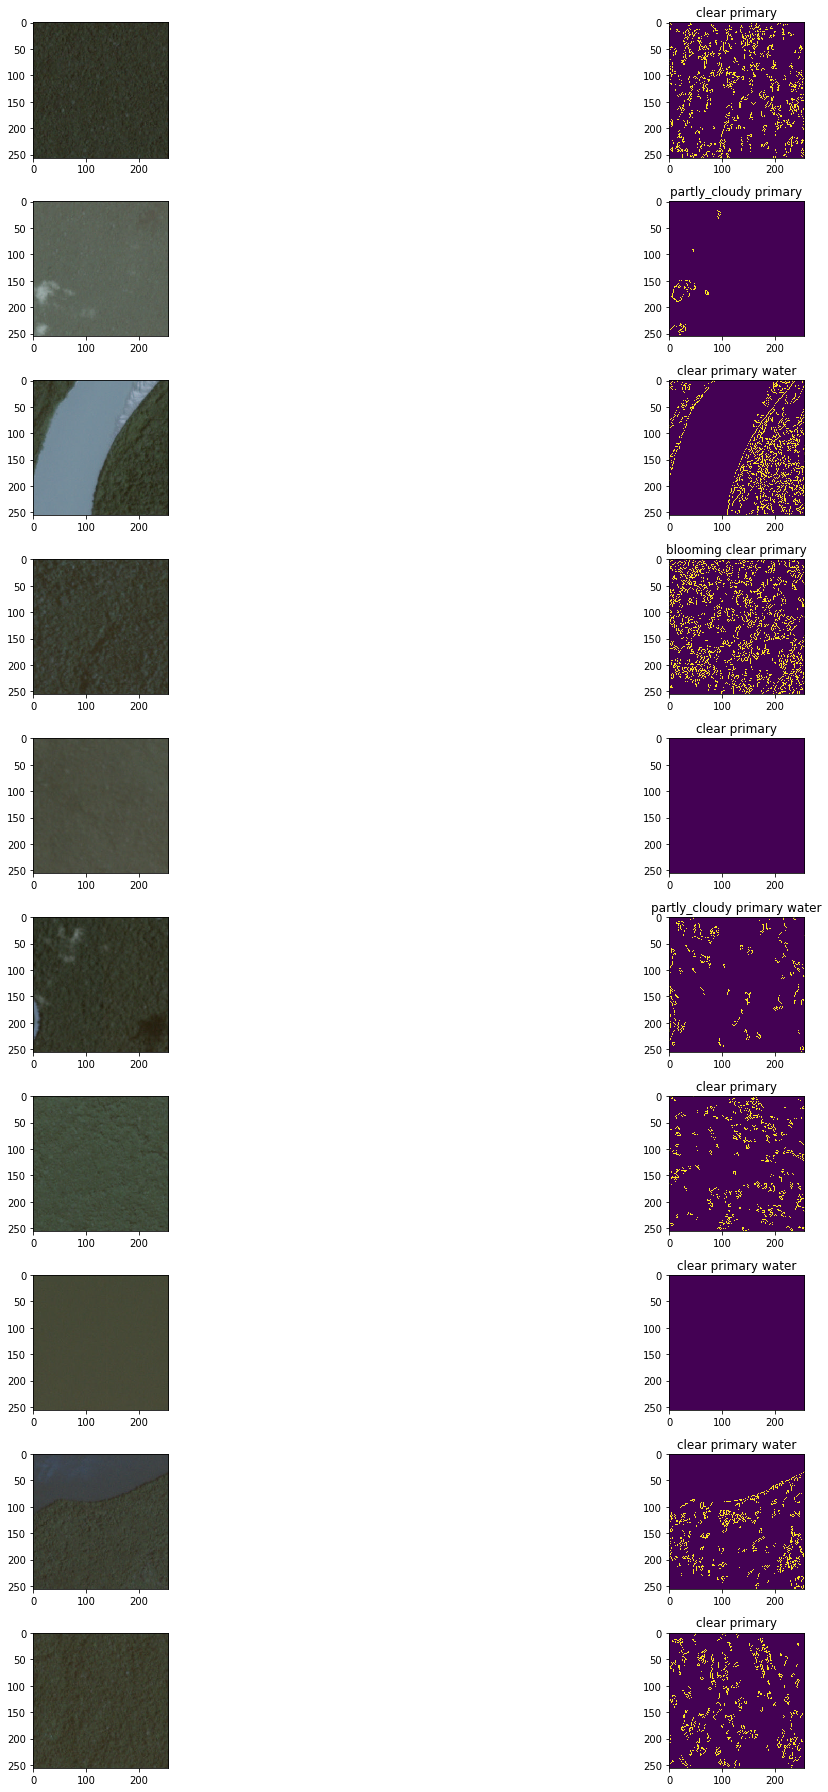

In [4]:
from matplotlib import pyplot as plt
from matplotlib import gridspec as gridspec
from matplotlib import image as mimage
%matplotlib inline
plot_size = 10

if plot_size > sample_size:
    plot_size = sample_size

figure, cur_plot = plt.subplots(plot_size, 2, figsize=(25, 25))

cis_edge = True
i = 0
for i in range(0,plot_size):
    cur_plot[i, 0].imshow(x_train[i])
    #cur_plot[i, 0].set_title(x_names[i])
    cur_plot[i, 1].imshow(x_train_edges[i])
    cur_plot[i, 1].set_title(sample_train.iloc[i]['tags'])

figure.subplots_adjust(wspace=0.1)
figure.tight_layout()
#figure.tight_layout()
#plt.show()

In [26]:
from PIL import Image
from skimage import io
#from spectral import *

%matplotlib inline

tiff_loc = input_loc + 'train-tif-v2/'

x_tif = []
x_tif_rb = []
x_tif_rg = []
x_tif_bg = []

def remove_color_channel(img, channel):
    new_image = get_rgb(img, [0, 0, 0])
    new_image[:,:,channel] = 0
    return new_image

def single_color_channel(img, channel):
    new_image = get_rgb(img, [1, 1, 1])
    for i in range(0,3):
        if i != channel:
            new_image[:,:,i] = 0
            
    return new_image

for f in tqdm(os.listdir(tiff_loc), miniters=100):
    if(f in sample_train.values):
        print(f)
    #img = io.imread(tiff_loc + f)
#     x_tif.append(img)
#x_tif_rg.append(remove_color_channel(img, 2))
#     x_tif_rb.append(remove_color_channel(img, 1))
#     x_tif_bg.append(remove_color_channel(img, 0))



  4%|▍         | 1665/40479 [00:00<00:02, 16644.50it/s]

[['train_35180' 'clear primary']
 ['train_38815' 'partly_cloudy primary']
 ['train_19273' 'clear primary water']
 ..., 
 ['train_2159' 'agriculture partly_cloudy primary']
 ['train_8945' 'bare_ground clear primary']
 ['train_33259' 'clear primary']]



100%|██████████| 40479/40479 [00:02<00:00, 17298.22it/s]

In [ ]:
from matplotlib import pyplot as plt
min_spot = 40
max_spot = 45
diff_spot = max_spot-min_spot
figure2, cur_plot2 = plt.subplots(5,4, figsize=(15, 15))
figure2.subplots_adjust(top=1., bottom = 0.)
print(len(x_tif))
#cur_plot2[1, 0].imshow(x_tif[25])
# for i in range(min_spot,max_spot):
#     row = i-min_spot
#     cur_plot2[row, 0].imshow(x_tif[i])
#     cur_plot2[row, 1].imshow(x_tif_rg[i])
#     cur_plot2[row, 2].imshow(x_tif_rb[i])
#     cur_plot2[row, 3].imshow(x_tif_bg[i])
